### Equities (and other assets) vs the S&P 500 

In [5]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#five stocks TSLA, AAPL, FB, GOOG, AMZN
#S&P500

### Part 1

In [6]:
tesla = pd.read_csv('TSLA.csv') #Tesla
apple = pd.read_csv('AAPL.csv') #Apple
facebook = pd.read_csv('FB.csv') #Facebook
google = pd.read_csv('GOOG.csv') #Google
amazon = pd.read_csv('AMZN.csv') #Amazon
sp_500 = pd.read_csv('S&P 500.csv') #S&P 500

date = pd.DataFrame(tesla, columns=['Date'])
tsla = pd.DataFrame(tesla, columns=['Adj Close'])
aapl = pd.DataFrame(apple, columns=['Adj Close'])
fb = pd.DataFrame(facebook, columns=['Adj Close'])
goog = pd.DataFrame(google, columns=['Adj Close'])
amzn = pd.DataFrame(amazon, columns=['Adj Close'])
sp500 = pd.DataFrame(sp_500, columns=['Adj Close'])


stockPrice = pd.concat([date,tsla,aapl,fb,goog,amzn,sp500],axis=1) 
#create a table
stockPrice.columns = ['Date','Tesla','Apple','Facebook','Google','Amazon','S&P 500']
#rename the cols
stockPrice.head()

,Date,Tesla,Apple,Facebook,Google,Amazon,S&P 500
0,2019-01-02,62.023998,38.326298,135.679993,1045.849976,1539.130005,2510.03
1,2019-01-03,60.071999,34.508713,131.740005,1016.059998,1500.280029,2447.89
2,2019-01-04,63.537998,35.981865,137.949997,1070.709961,1575.390015,2531.94
3,2019-01-07,66.991997,35.901775,138.050003,1068.390015,1629.510010,2549.69
4,2019-01-08,67.070000,36.586174,142.529999,1076.280029,1656.579956,2574.41


In [7]:
#The Total Count
stockPrice.count()

Date        251
Tesla       251
Apple       251
Facebook    251
Google      251
Amazon      251
S&P 500     251
dtype: int64

### Part 2

In [8]:
#Part 2a
TSLAPC = tsla.pct_change(axis=0, periods=1)
AAPLPC = aapl.pct_change(axis=0, periods=1)
FBPC = fb.pct_change(axis=0, periods=1)
GOOGPC = goog.pct_change(axis=0, periods=1)
AMZNPC = amzn.pct_change(axis=0, periods=1)
SP500PC = sp500.pct_change(axis=0, periods=1)

percentchange = pd.concat([date,tsla,TSLAPC,aapl,AAPLPC,fb,FBPC,goog,GOOGPC,amzn,AMZNPC,sp500,SP500PC],axis=1)
percentchange=percentchange.iloc[0: , :]
TSLAPC=TSLAPC.iloc[0: , :]
AAPLPC=AAPLPC.iloc[0: , :]
FBPC=FBPC.iloc[0: , :]
GOOGPC=GOOGPC.iloc[0: , :]
AMZNPC=AMZNPC.iloc[0: , :]
SP500PC=SP500PC.iloc[0: , :]

#create a table
percentchange.columns = ['Date','Tesla',"TSLA % Change",'Apple',"Apple % Change",'Facebook',"FB % Change",'Google',"Google % Change",'Amazon',"Amazon % Change",'S&P 500',"S&P 500 % Change"]
#rename the cols
percentchange.head()

,Date,Tesla,TSLA % Change,Apple,Apple % Change,Facebook,FB % Change,Google,Google % Change,Amazon,Amazon % Change,S&P 500,S&P 500 % Change
0,2019-01-02,62.023998,NaN,38.326298,NaN,135.679993,NaN,1045.849976,NaN,1539.130005,NaN,2510.03,NaN
1,2019-01-03,60.071999,-0.031472,34.508713,-0.099607,131.740005,-0.029039,1016.059998,-0.028484,1500.280029,-0.025242,2447.89,-0.024757
2,2019-01-04,63.537998,0.057697,35.981865,0.042689,137.949997,0.047138,1070.709961,0.053786,1575.390015,0.050064,2531.94,0.034336
3,2019-01-07,66.991997,0.054361,35.901775,-0.002226,138.050003,0.000725,1068.390015,-0.002167,1629.510010,0.034353,2549.69,0.007010
4,2019-01-08,67.070000,0.001164,36.586174,0.019063,142.529999,0.032452,1076.280029,0.007385,1656.579956,0.016612,2574.41,0.009695


In [9]:
#The Total Count
percentchange.count()

Date                251
Tesla               251
TSLA % Change       250
Apple               251
Apple % Change      250
Facebook            251
FB % Change         250
Google              251
Google % Change     250
Amazon              251
Amazon % Change     250
S&P 500             251
S&P 500 % Change    250
dtype: int64

<IPython.core.display.Javascript object>


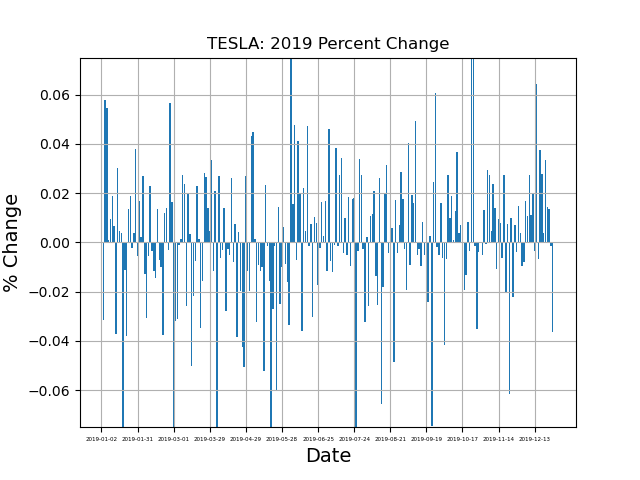

In [10]:
#Part2b: Tesla

tsla = pd.DataFrame(percentchange, columns=['TSLA % Change',"Date"])
plt.bar(tsla['Date'], tsla['TSLA % Change'])

ticks_to_use=np.arange(0,len(tsla),20)
labels=[tsla.index[i] for i in ticks_to_use]
plt.xticks(labels, fontsize=4)

plt.title('TESLA: 2019 Percent Change')
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Change', fontsize=14)
plt.grid(True)
plt.ylim([-0.075, 0.075])
plt.show()




<IPython.core.display.Javascript object>


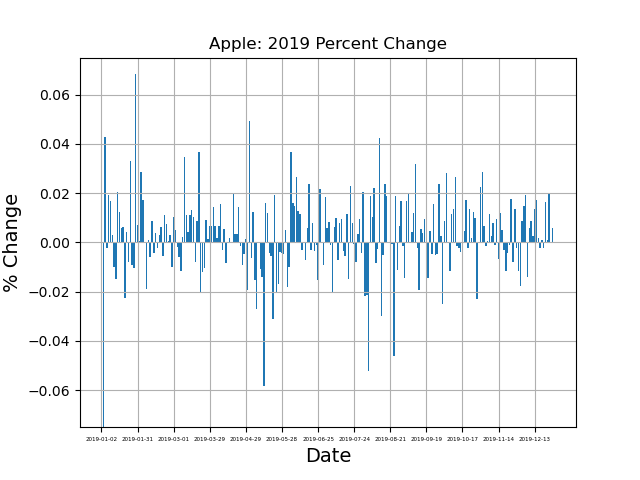

In [22]:
#Part2b: Apple

AAPL = pd.DataFrame(percentchange, columns=["Apple % Change","Date"])
plt.bar(AAPL['Date'], AAPL["Apple % Change"])

ticks_to_use=np.arange(0,len(AAPL),20)
labels=[AAPL.index[i] for i in ticks_to_use]
plt.xticks(labels, fontsize=4)

plt.title('Apple: 2019 Percent Change')
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Change', fontsize=14)
plt.grid(True)
plt.ylim([-0.075, 0.075])
plt.show()

<IPython.core.display.Javascript object>


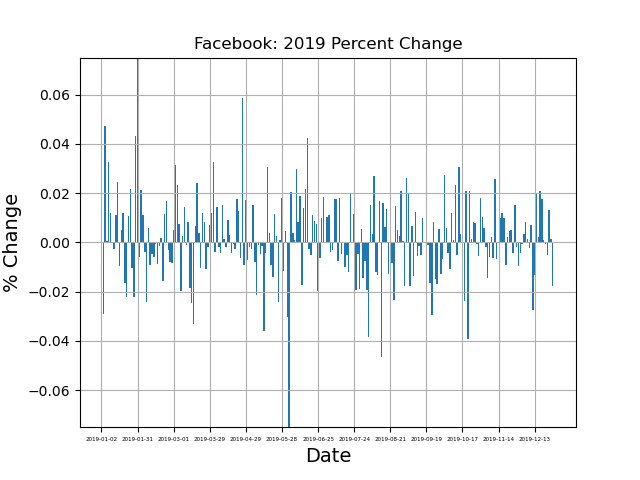

In [12]:
#Part2b: Facebook

FB = pd.DataFrame(percentchange, columns=["FB % Change","Date"])
plt.bar(FB['Date'], FB["FB % Change"])

ticks_to_use=np.arange(0,len(FB),20)
labels=[FB.index[i] for i in ticks_to_use]
plt.xticks(labels, fontsize=4)

plt.title('Facebook: 2019 Percent Change')
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Change', fontsize=14)
plt.grid(True)
plt.ylim([-0.075, 0.075])
plt.show()

<IPython.core.display.Javascript object>


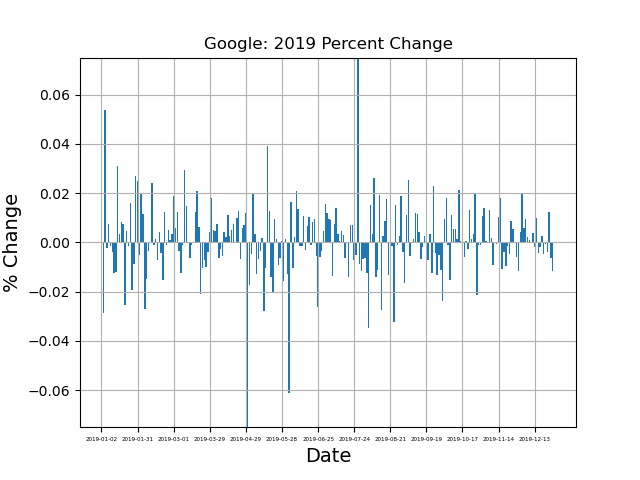

In [13]:
#Part2b: Google

Google = pd.DataFrame(percentchange, columns=["Google % Change","Date"])
plt.bar(Google['Date'], Google["Google % Change"])

ticks_to_use=np.arange(0,len(Google),20)
labels=[Google.index[i] for i in ticks_to_use]
plt.xticks(labels, fontsize=4)

plt.title('Google: 2019 Percent Change')
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Change', fontsize=14)
plt.grid(True)
plt.ylim([-0.075, 0.075])
plt.show()

<IPython.core.display.Javascript object>


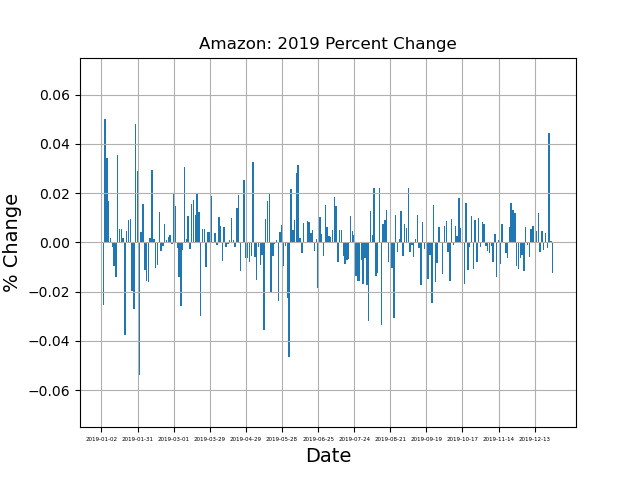

In [14]:
#Part2b: Amazon

Amazon = pd.DataFrame(percentchange, columns=["Amazon % Change","Date"])
plt.bar(Amazon['Date'], Amazon["Amazon % Change"])

ticks_to_use=np.arange(0,len(Amazon),20)
labels=[Amazon.index[i] for i in ticks_to_use]
plt.xticks(labels, fontsize=4)

plt.title('Amazon: 2019 Percent Change')
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Change', fontsize=14)
plt.grid(True)
plt.ylim([-0.075, 0.075])
plt.show()

<IPython.core.display.Javascript object>


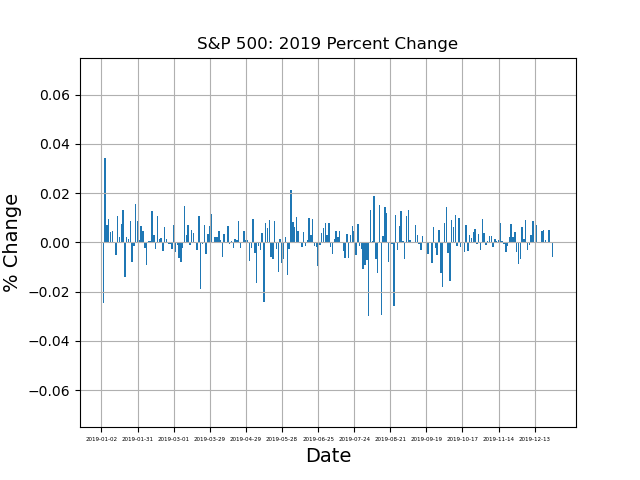

In [15]:
#Part2: S&P 500

SP500 = pd.DataFrame(percentchange, columns=["S&P 500 % Change","Date"])
plt.bar(SP500['Date'], SP500["S&P 500 % Change"])

ticks_to_use=np.arange(0,len(SP500),20)
labels=[SP500.index[i] for i in ticks_to_use]
plt.xticks(labels, fontsize=4)

plt.title('S&P 500: 2019 Percent Change')
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Change', fontsize=14)
plt.grid(True)
plt.ylim([-0.075, 0.075])
plt.show()

In [16]:
#Part 2c
stockPrice.describe()

,Tesla,Apple,Facebook,Google,Amazon,S&P 500
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,54.590661,50.911600,181.543426,1187.800918,1788.955538,2912.091753
std,10.467580,8.580406,16.014201,81.385553,101.448012,149.623215
min,35.793999,34.508713,131.740005,1016.059998,1500.280029,2447.890000
25%,46.426001,45.402412,171.995002,1121.474976,1735.780029,2822.360000
50%,52.034000,49.687859,184.509995,1184.619995,1786.400024,2918.650000
75%,62.192999,54.853081,193.014999,1239.485046,1855.319946,3000.420000
max,86.188004,71.813278,208.100006,1361.170044,2020.989990,3240.020000


### Part 3

<IPython.core.display.Javascript object>


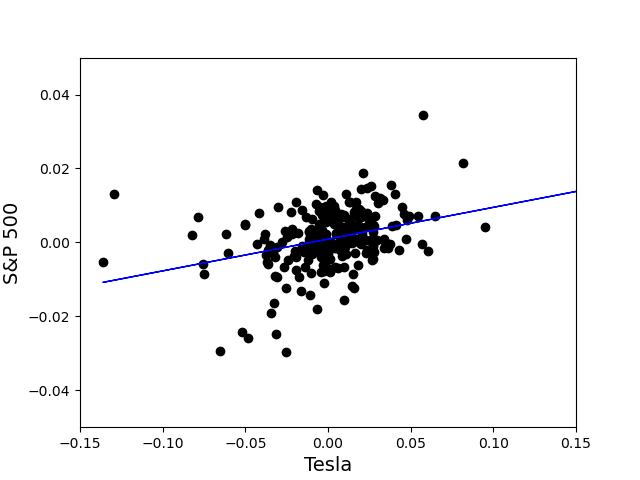

Intercept: [0.00088855]
Coefficient (Slope):  [[0.08597478]]
R Squared:  0.11327416288224856
Mean squared error: 0.0008485642215810882


In [17]:
TSLAPC1=TSLAPC.iloc[1: , :]
AAPLPC1=AAPLPC.iloc[1: , :]
FBPC1=FBPC.iloc[1: , :]
GOOGPC1=GOOGPC.iloc[1: , :]
AMZNPC1=AMZNPC.iloc[1: , :]
SP500PC1=SP500PC.iloc[1: , :]


y=SP500PC1
t=TSLAPC1
a=AAPLPC1
f=FBPC1
g=GOOGPC1
A=AMZNPC1

#Tesla
regr = linear_model.LinearRegression()
regr.fit(t, y)

y_pred = regr.predict(t)
r2 = r2_score(y,y_pred)
mse = mean_squared_error(t, y)
plt.plot(t,y_pred, color="blue", linewidth=1)
plt.scatter(t, y, color="black")
plt.xlabel('Tesla', fontsize=14)
plt.ylabel('S&P 500', fontsize=14)
plt.xlim([-0.15, 0.15])
plt.ylim([-0.05, 0.05])
plt.show()
#plot

print('Intercept:',regr.intercept_)
print('Coefficient (Slope): ',regr.coef_)
print('R Squared: ',r2)
print('Mean squared error:', mse)

<IPython.core.display.Javascript object>


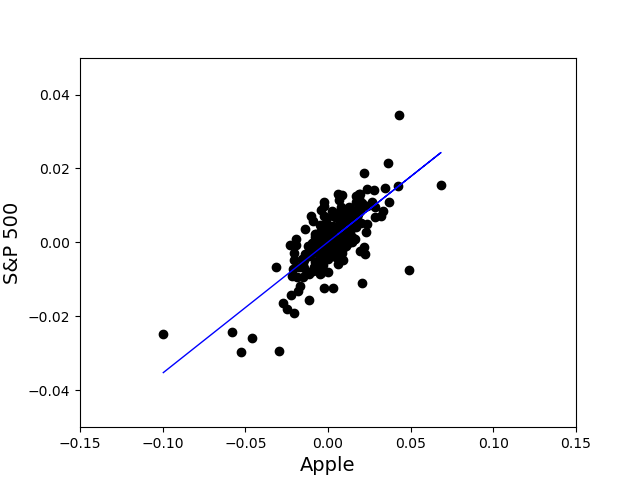

Intercept: [8.92145727e-05]
Coefficient (Slope):  [[0.35453836]]
R Squared:  0.5520235415916841
Mean squared error: 0.0001437538640765563


In [18]:
#Apple
regr = linear_model.LinearRegression()
regr.fit(a, y)


y_pred = regr.predict(a)
r2 = r2_score(y,y_pred)
mse = mean_squared_error(a, y)
plt.plot(a,y_pred, color="blue", linewidth=1)
plt.scatter(a, y, color="black")
plt.xlabel('Apple', fontsize=14)
plt.ylabel('S&P 500', fontsize=14)
plt.xlim([-0.15, 0.15])
plt.ylim([-0.05, 0.05])
plt.show()
#plot

print('Intercept:',regr.intercept_)
print('Coefficient (Slope): ',regr.coef_)
print('R Squared: ',r2)
print('Mean squared error:', mse)

<IPython.core.display.Javascript object>


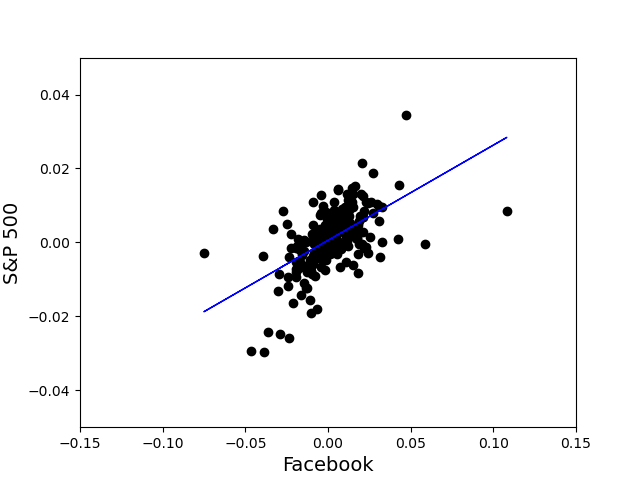

Intercept: [0.00056804]
Coefficient (Slope):  [[0.25749419]]
R Squared:  0.32660560908454817
Mean squared error: 0.00021056972051132023


In [19]:
#Facebook
regr = linear_model.LinearRegression()
regr.fit(f, y)


y_pred = regr.predict(f)
r2 = r2_score(y,y_pred)
mse = mean_squared_error(f, y)
plt.plot(f,y_pred, color="blue", linewidth=1)
plt.scatter(f, y, color="black")
plt.xlabel('Facebook', fontsize=14)
plt.ylabel('S&P 500', fontsize=14)
plt.xlim([-0.15, 0.15])
plt.ylim([-0.05, 0.05])
plt.show()
#plot

print('Intercept:',regr.intercept_)
print('Coefficient (Slope): ',regr.coef_)
print('R Squared: ',r2)
print('Mean squared error:', mse)

<IPython.core.display.Javascript object>


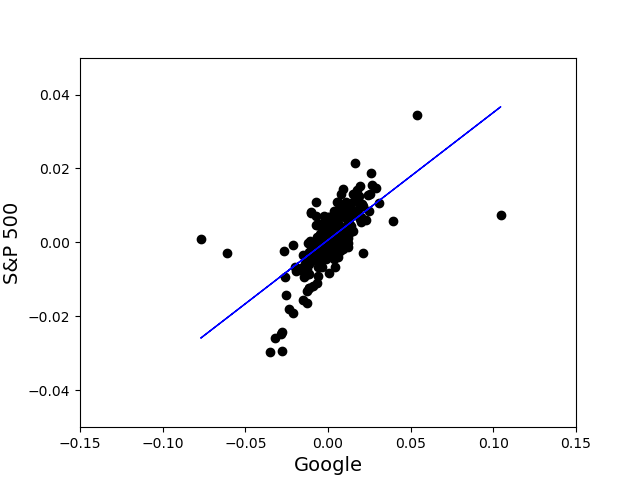

Intercept: [0.00065157]
Coefficient (Slope):  [[0.34493423]]
R Squared:  0.4452929330867663
Mean squared error: 0.0001338794734177352


In [20]:
#Google

regr = linear_model.LinearRegression()
regr.fit(g, y)


y_pred = regr.predict(g)
r2 = r2_score(y,y_pred)
mse = mean_squared_error(g, y)
plt.plot(g,y_pred, color="blue", linewidth=1)
plt.scatter(g, y, color="black")
plt.xlabel('Google', fontsize=14)
plt.ylabel('S&P 500', fontsize=14)
plt.xlim([-0.15, 0.15])
plt.ylim([-0.05, 0.05])
plt.show()
#plot

print('Intercept:',regr.intercept_)
print('Coefficient (Slope): ',regr.coef_)
print('R Squared: ',r2)
print('Mean squared error:', mse)

<IPython.core.display.Javascript object>


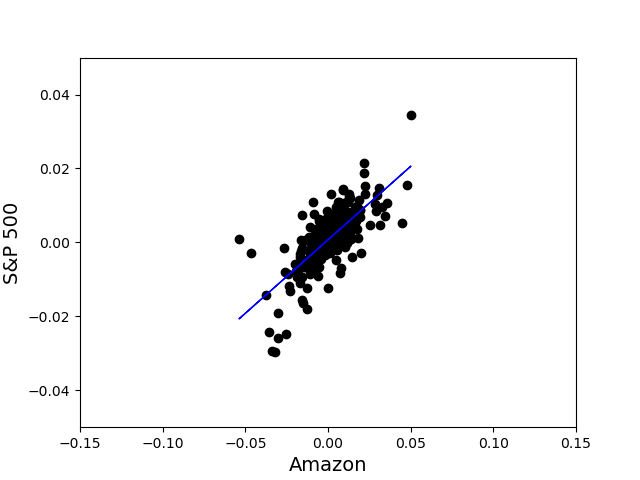

Intercept: [0.0006984]
Coefficient (Slope):  [[0.39755001]]
R Squared:  0.5275885860364082
Mean squared error: 0.00010437773013455817


In [21]:
#Amazon
regr = linear_model.LinearRegression()
regr.fit(A, y)


y_pred = regr.predict(A)
r2 = r2_score(y,y_pred)
mse = mean_squared_error(A, y)
plt.plot(A,y_pred, color="blue", linewidth=1)
plt.scatter(A, y, color="black")
plt.xlabel('Amazon', fontsize=14)
plt.ylabel('S&P 500', fontsize=14)
plt.xlim([-0.15, 0.15])
plt.ylim([-0.05, 0.05])
plt.show()
#plot

print('Intercept:',regr.intercept_)
print('Coefficient (Slope): ',regr.coef_)
print('R Squared: ',r2)
print('Mean squared error:', mse)

### Part 3d: Apple is highly correlated with S&P 500, while Tesla is the least correlated.